<a href="https://colab.research.google.com/github/muthonioprah/NeuralNet/blob/main/RNN_COVID_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID PREDICTION

## 1. Defining the Question

## a) Specifying the Question
Our aim is to build a model that can predict whether one has COVID19 based on the symptoms they show.

## b) Defining the Metric for Success
The accuracy and recall of our model should exceed 75%. A recall of above 75% will be needed so as not to have many false negatives.

## c) Understanding the context
Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.
Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment. However, some will become seriously ill and require medical attention.

HOW IT SPREADS

The virus can spread from an infected person’s mouth or nose in small liquid particles when they cough, sneeze, speak, sing or breathe.

The severity of COVID-19 symptoms can range from very mild to severe. Some people may have only a few symptoms. Some people may have no symptoms at all, but can still spread it (asymptomatic transmission). 

# 2. Reading the Data


In [ ]:
# Importing the required libraries
# For data analysis
import pandas as pd
import numpy as np
import seaborn as sns

# For creating visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

# For Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# For multivariate analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# for creating models 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score

# Tensorflow Imports
import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow

from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
# For prevention of warning messages
import warnings
warnings.filterwarnings(action = 'ignore')

# Reading the dataset 
df = pd.read_csv('/content/covid.csv')

In [ ]:
# Previewing the head of the dataset
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [ ]:
# Previewing the tail of the dataset
df.tail()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
2742591,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742592,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742593,2020-03-11,0,0,0,0,0,other,NaN,male,Other
2742594,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742595,2020-03-11,0,1,0,0,0,negative,NaN,male,Other


## 3. Data Understanding

In [ ]:
#getting the info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 209.2+ MB


In [ ]:
#getting the info on the dataset
df.shape

(2742596, 10)

In [ ]:
# Getting a brief a statistical overview of the dataset
df.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,2.742596e+06,2.742596e+06,2.742596e+06,2.742596e+06,2.742596e+06
mean,4.059584e-02,3.536649e-02,1.096917e-02,4.016997e-03,2.185557e-02
std,1.973521e-01,1.847044e-01,1.041578e-01,6.325237e-02,1.462119e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# 4. Data Cleaning

In [ ]:
# Checking for null values
df.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [ ]:
# Checking for null values as a percentage
# Sorting the missing values in a descending order
#
(df.isna().mean().round(4) * 100).sort_values(ascending = False)

age_60_and_above       19.97
gender                  3.39
test_date               0.00
cough                   0.00
fever                   0.00
sore_throat             0.00
shortness_of_breath     0.00
head_ache               0.00
corona_result           0.00
test_indication         0.00
dtype: float64

In [ ]:
# Dropping the null values in the dataset since they are few and won't affect the model.
df.dropna()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2731639,2020-03-20,1,1,1,1,1,positive,No,female,Contact with confirmed
2731640,2020-03-20,0,0,0,0,0,negative,No,female,Other
2731643,2020-03-20,1,0,0,0,0,negative,No,male,Contact with confirmed
2731644,2020-03-20,0,0,0,0,0,negative,No,female,Other


> Null values were dropped since they were very small in quantity.

In [ ]:
# Checking for duplicates in the dataset
df.duplicated().sum()

2695099

The duplicates were not dropped because they represented different instances of the variables. Such as Negative value occured in several times in corona_result column, in which pandas read it as a duplicate whereas it is not

In [ ]:
# Checking the value counts of the corona result variable that is going to be
# our target variable
df.corona_result.value_counts()

negative    2480403
positive     220975
other         41218
Name: corona_result, dtype: int64

In [ ]:
# Dropping 'other' category to make the category binary
df1 = df.query('`corona_result` != "other"')
df1.corona_result.value_counts()

negative    2480403
positive     220975
Name: corona_result, dtype: int64

In [ ]:
# Checking unique values in the test_date
df['test_date'].unique()

array(['2020-11-12', '2020-11-11', '2020-11-10', '2020-11-09',
       '2020-11-08', '2020-11-07', '2020-11-06', '2020-11-05',
       '2020-11-04', '2020-11-03', '2020-11-02', '2020-11-01',
       '2020-10-31', '2020-10-30', '2020-10-29', '2020-10-28',
       '2020-10-27', '2020-10-26', '2020-10-25', '2020-10-24',
       '2020-10-23', '2020-10-22', '2020-10-21', '2020-10-20',
       '2020-10-19', '2020-10-18', '2020-10-17', '2020-10-16',
       '2020-10-15', '2020-10-14', '2020-10-13', '2020-10-12',
       '2020-10-11', '2020-10-10', '2020-10-09', '2020-10-08',
       '2020-10-07', '2020-10-06', '2020-10-05', '2020-10-04',
       '2020-10-03', '2020-10-02', '2020-10-01', '2020-09-30',
       '2020-09-29', '2020-09-28', '2020-09-27', '2020-09-26',
       '2020-09-25', '2020-09-24', '2020-09-23', '2020-09-22',
       '2020-09-21', '2020-09-20', '2020-09-19', '2020-09-18',
       '2020-09-17', '2020-09-16', '2020-09-15', '2020-09-14',
       '2020-09-13', '2020-09-12', '2020-09-11', '2020-

In [ ]:
# Checking the datatypes in the columns
df.dtypes

test_date              object
cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

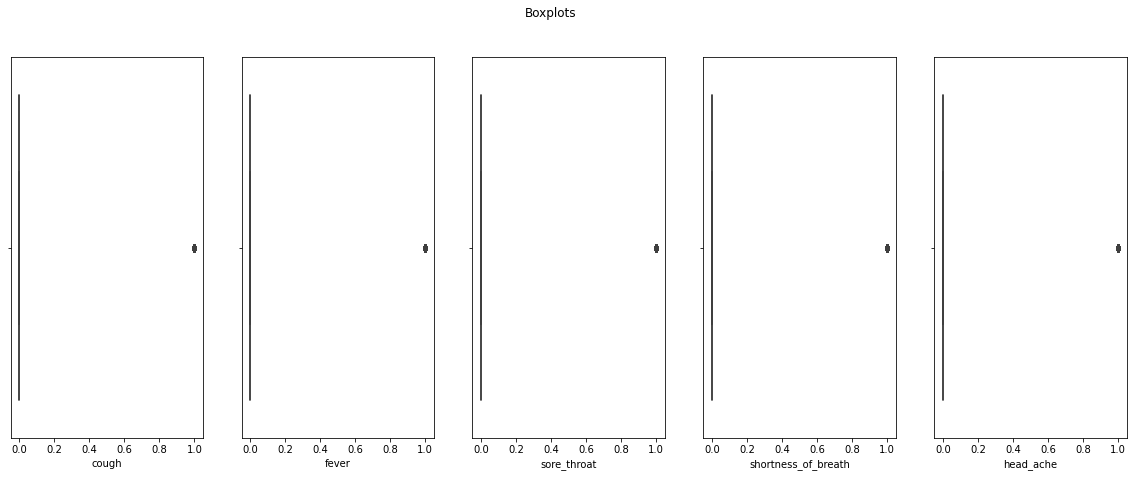

In [ ]:
# Checking for Outliers
#
fig, ((ax1, ax2, ax3,ax4,ax5)) = plt.subplots(1,5, figsize=(20,7))
fig.suptitle('Boxplots')
sns.boxplot(df['cough'], ax=ax1)
sns.boxplot(df['fever'], ax=ax2)
sns.boxplot(df['sore_throat'], ax=ax3)
sns.boxplot(df['shortness_of_breath'], ax=ax4)
sns.boxplot(df['head_ache'], ax=ax5)

plt.show()

In [ ]:
## Creating a random Sample.
# A random sample was created since the dataset is very large.
# Selecting the sample 
df_sample = df1[['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'gender',
       'test_indication']].sample(n = 200000, replace="False")
df_sample.shape

(200000, 9)

In [ ]:
# Saving the data sample to a new csv file
df_sample.to_csv('df_sample.csv', index=False)

## 5. Exploratory Data Analysis

### 5.1 Univariate Analysis.

#### 5.1.1 Categorical Variables

##### a) Mode

In [ ]:
df.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication'],
      dtype='object')

In [ ]:
# Getting the mode of the columns
#using for loops to get the mode of the columns
columns1 = ['test_date','cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result','age_60_and_above', 'gender',
       'test_indication']
for column in columns1:
  print('\n')
  print(column + ', Mode: ' + str(df[column].mode()))



test_date, Mode: 0    2020-09-17
dtype: object


cough, Mode: 0    0
dtype: int64


fever, Mode: 0    0
dtype: int64


sore_throat, Mode: 0    0
dtype: int64


shortness_of_breath, Mode: 0    0
dtype: int64


head_ache, Mode: 0    0
dtype: int64


corona_result, Mode: 0    negative
dtype: object


age_60_and_above, Mode: 0    No
dtype: object


gender, Mode: 0    female
dtype: object


test_indication, Mode: 0    Other
dtype: object


##### b) Frequency Tables

In [ ]:
# Getting the value counts of the variables
# creating an array of categrical columns
for column in columns1:
  print('\n')
  print(column + ', Value Counts: ' + str(df[column].value_counts()))





test_date, Value Counts: 2020-09-17    36557
2020-09-24    33271
2020-09-22    32491
2020-09-23    32331
2020-09-15    31323
              ...  
2020-03-14      732
2020-05-16      703
2020-03-12      636
2020-05-23      597
2020-03-11      365
Name: test_date, Length: 247, dtype: int64


cough, Value Counts: 0    2631258
1     111338
Name: cough, dtype: int64


fever, Value Counts: 0    2645600
1      96996
Name: fever, dtype: int64


sore_throat, Value Counts: 0    2712512
1      30084
Name: sore_throat, dtype: int64


shortness_of_breath, Value Counts: 0    2731579
1      11017
Name: shortness_of_breath, dtype: int64


head_ache, Value Counts: 0    2682655
1      59941
Name: head_ache, dtype: int64


corona_result, Value Counts: negative    2480403
positive     220975
other         41218
Name: corona_result, dtype: int64


age_60_and_above, Value Counts: No     1908553
Yes     286399
Name: age_60_and_above, dtype: int64


gender, Value Counts: female    1371444
male      1278266
N

##### c) Bar Graphs

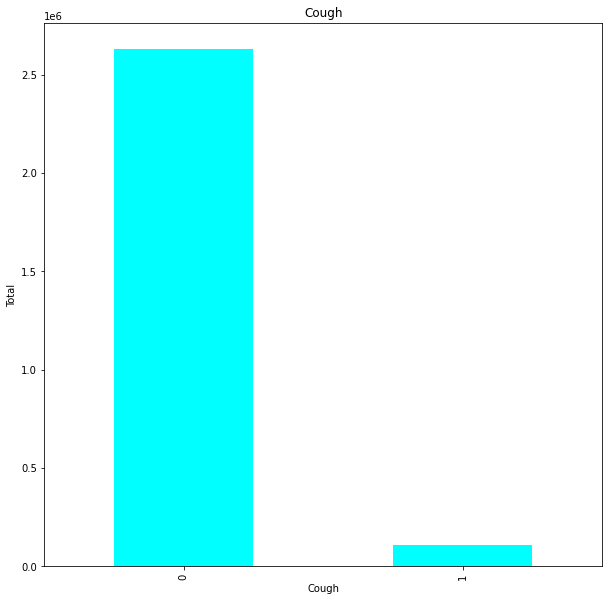

In [ ]:
# Plotting Bar Graphs
# Bar graph for cough variable
plt.figure(figsize = (10,10))
df.groupby('cough').size().plot(kind='bar', color='aqua')
plt.title('Cough')
plt.ylabel('Total')
plt.xlabel('Cough')
plt.show()

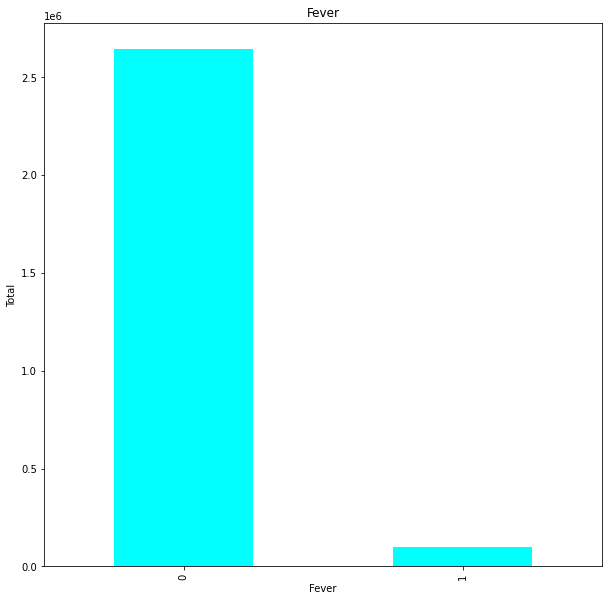

In [ ]:
plt.figure(figsize = (10,10))
df.groupby('fever').size().plot(kind='bar', color='aqua')
plt.title('Fever')
plt.ylabel('Total')
plt.xlabel('Fever')
plt.show()

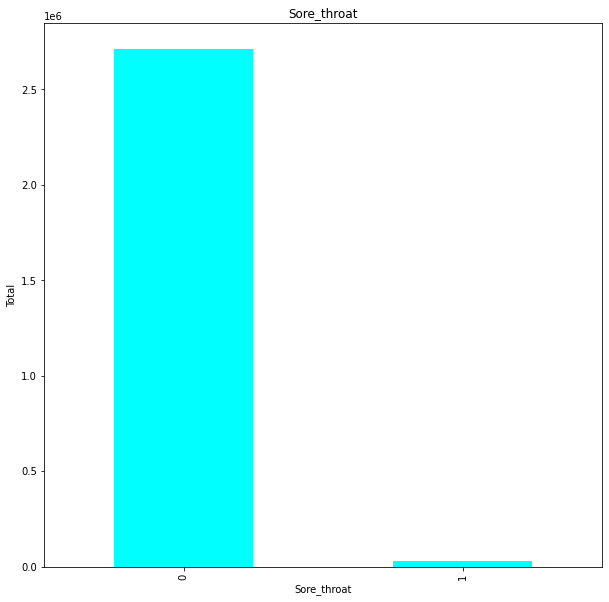

In [ ]:
plt.figure(figsize = (10,10))
df.groupby('sore_throat').size().plot(kind='bar', color='aqua')
plt.title('Sore_throat')
plt.ylabel('Total')
plt.xlabel('Sore_throat')
plt.show()

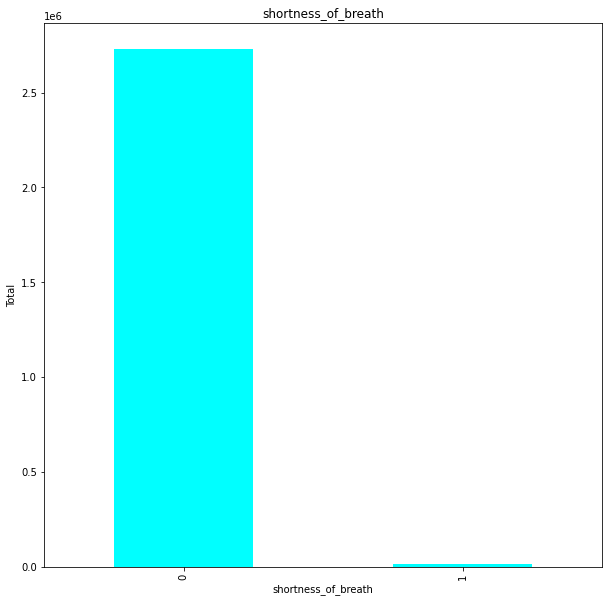

In [ ]:
plt.figure(figsize = (10,10))
df.groupby('shortness_of_breath').size().plot(kind='bar', color='aqua')
plt.title('shortness_of_breath')
plt.ylabel('Total')
plt.xlabel('shortness_of_breath')
plt.show()

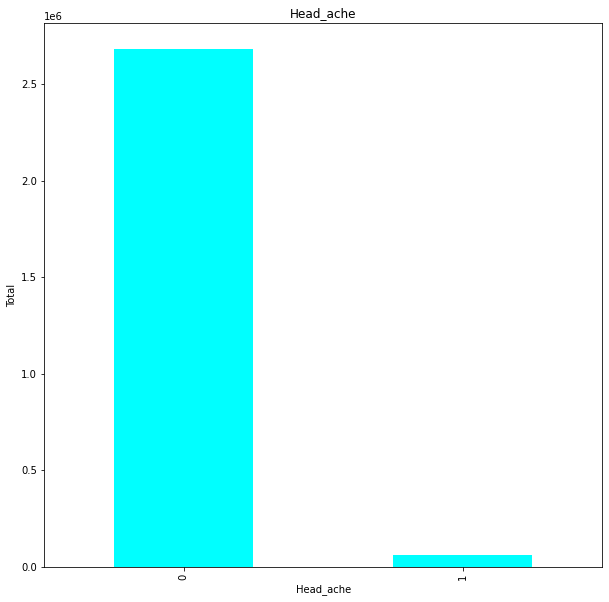

In [ ]:
plt.figure(figsize = (10,10))
df.groupby('head_ache').size().plot(kind='bar', color='aqua')
plt.title('Head_ache')
plt.ylabel('Total')
plt.xlabel('Head_ache')
plt.show()

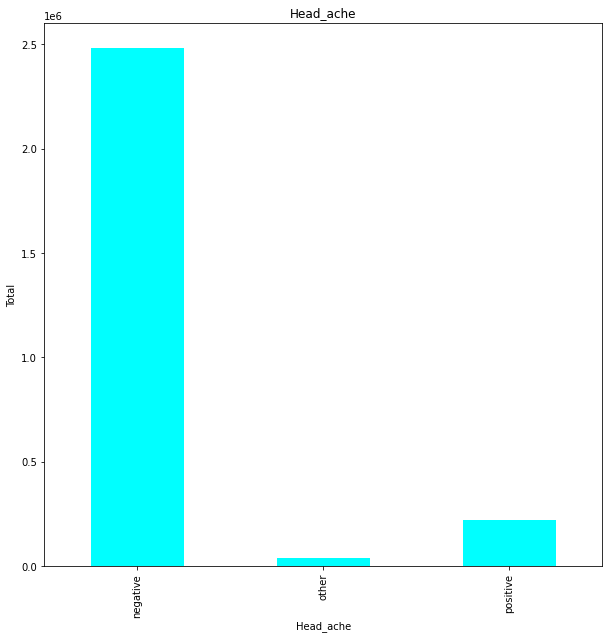

In [ ]:
plt.figure(figsize = (10,10))
df.groupby('corona_result').size().plot(kind='bar', color='aqua')
plt.title('Head_ache')
plt.ylabel('Total')
plt.xlabel('Head_ache')
plt.show()

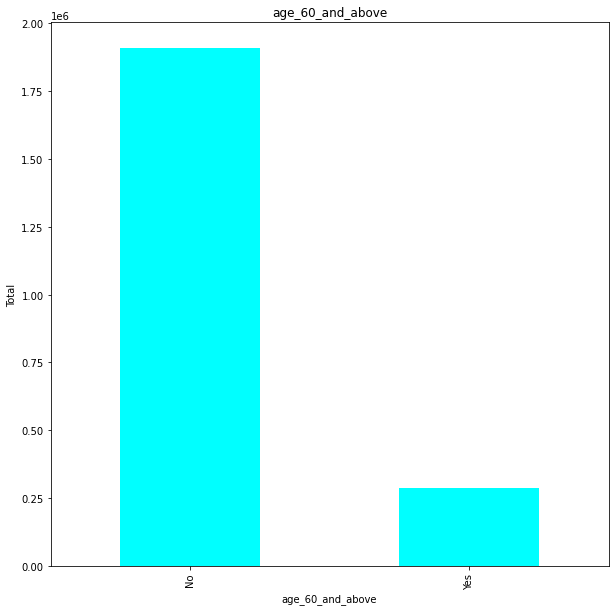

In [ ]:
plt.figure(figsize = (10,10))
df.groupby('age_60_and_above').size().plot(kind='bar', color='aqua')
plt.title('age_60_and_above')
plt.ylabel('Total')
plt.xlabel('age_60_and_above')
plt.show()

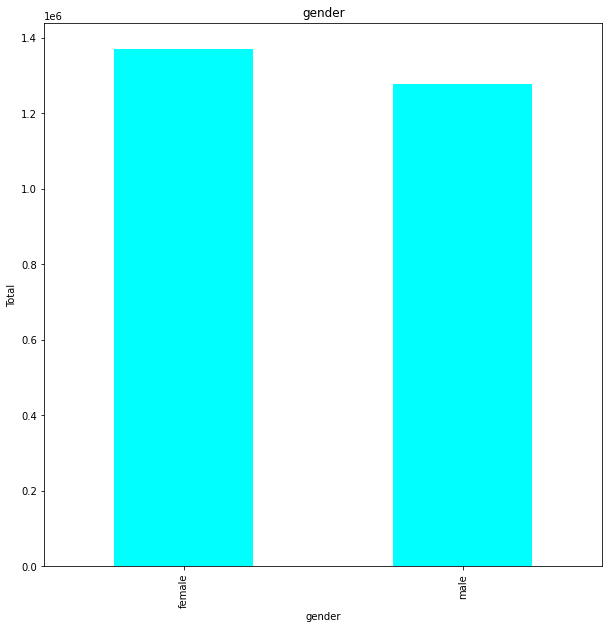

In [ ]:
plt.figure(figsize = (10,10))
df.groupby('gender').size().plot(kind='bar', color='aqua')
plt.title('gender')
plt.ylabel('Total')
plt.xlabel('gender')
plt.show()

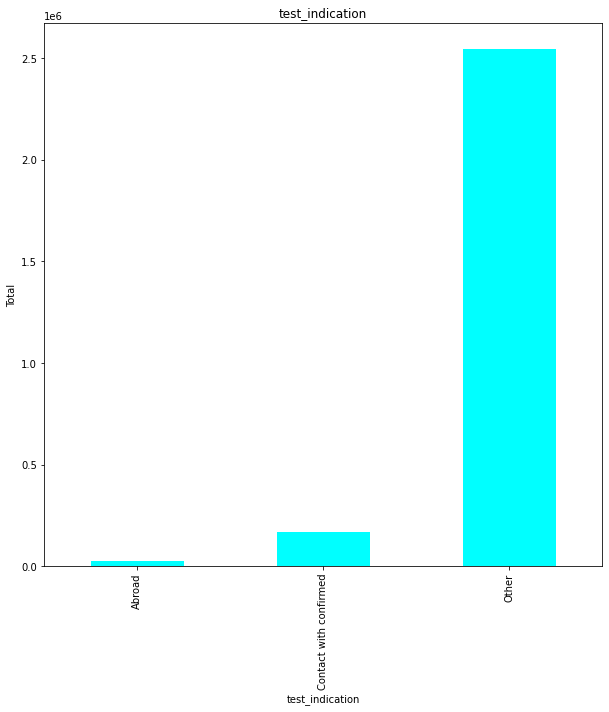

In [ ]:
plt.figure(figsize = (10,10))
df.groupby('test_indication').size().plot(kind='bar', color='aqua')
plt.title('test_indication')
plt.ylabel('Total')
plt.xlabel('test_indication')
plt.show()

> From most of the bar graphs we can conclude that our dataset is imbalanced.

### 5.2 Bivariate Analysis.

In [ ]:
# convert categorical data to numerical using the label encoder technique
from sklearn.preprocessing import LabelEncoder
df_sample = df_sample.apply(LabelEncoder().fit_transform)

In [ ]:
df1.dtypes

test_date              object
cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

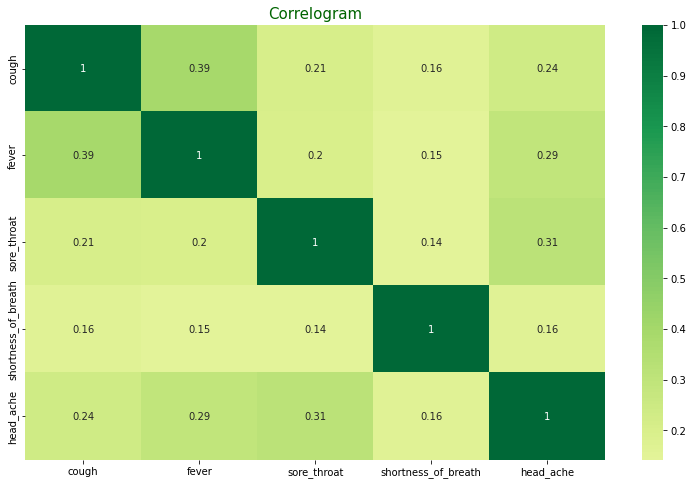

In [ ]:
# Plotting a heatmap to show correlations between variables
#
corr = df.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

> From the correlation heat map we can see that most of the variables had a low correlation with each of the other variables.

### 5.2 Multivariate Analysis.

In [ ]:
# Dividing the dataset into feature and target variables
X = df_sample.drop('corona_result', 1)
y = df_sample['corona_result']

In [ ]:
lda = LDA(solver='eigen',shrinkage='auto')
X_lda = lda.fit(X,y)
lda_feat = X_lda.transform(X)
#Display the coefficients of the reducted colums
X_lda.coef_

array([[ 0.00869142,  0.38923866,  3.81431986,  4.21439013,  3.87662991,
         6.23635414,  0.11302215, -4.39500805]])

In [ ]:
#Since the coefficients are in array, we need to create a dataframe so that we can extract the name of the columns
lda_df = pd.DataFrame(index=X.columns.values, data=X_lda.coef_[0].T)
lda_df.sort_values(0, ascending=False)

,0
head_ache,6.236354
sore_throat,4.214390
shortness_of_breath,3.876630
fever,3.814320
cough,0.389239
gender,0.113022
test_date,0.008691
test_indication,-4.395008


The factors that influence the outcome of a hypothyroid test include: test indication, sore throat, cough and headache. 

Weakly determinants include fever, gender, age60 and above and test date

The rest do not.

## 7. Creating the models.

### 7.1 Logistic Regression Model

#### 7.1.1 Base Model

In [ ]:
# Dividing the dataset into feature and target variables
X = df_sample.drop('corona_result', 1)
y = df_sample['corona_result']

In [ ]:
# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140000, 8)
(60000, 8)
(140000,)
(60000,)


In [ ]:
# Fitting our model
# 
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix

print(f'The accuracy score is: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9277833333333333


              precision    recall  f1-score   support

           0       0.94      0.99      0.96     55110
           1       0.65      0.25      0.36      4890

    accuracy                           0.93     60000
   macro avg       0.79      0.62      0.66     60000
weighted avg       0.91      0.93      0.91     60000



array([[54460,   650],
       [ 3683,  1207]])

> Though the accuracy is high, recall is low as well as precision. Since this is model deals with diagnosing a health condition we will need to balance the dataset and optimize our models in order to increase recall.
> The confusion matrix shows that our model has misclassified a lot of records.

#### 7.1.2 Balancing the imbalanced dataset

In [ ]:
# installing scikit_plot for visualizing the imbalanced dataset
!pip install scikit-plot

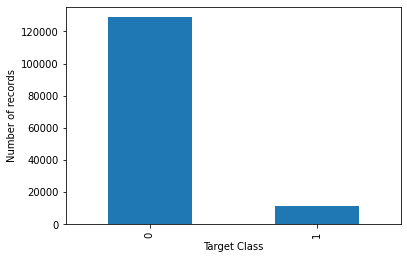

In [ ]:
# Visualising the imbalanced dataset
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

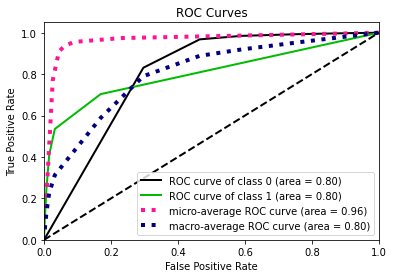

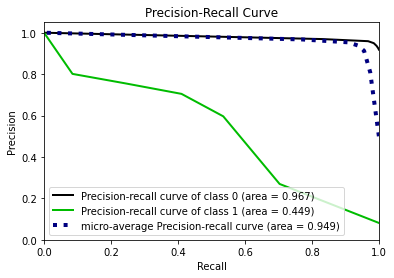

In [ ]:
# Plotting ROC Curve of the imbalanced dataset
from sklearn.neighbors import KNeighborsClassifier
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)
# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

In [ ]:
#defining a threshold which splits majority and minority classes
import numpy as np
n_samples = int(count.median())
n_samples

70000

In [ ]:
# define a utility function which receives as input the dataset,
# the threshold (n_samples) and the involved classes (majority or minority)
# This function returns a dict which contains 
# the number of desired samples for each class belonging to the involved classes.
def sampling_strategy(X,y,n_samples, t='majority'):
    target_classes = ''
    if t == 'majority':
        target_classes = y.value_counts() > n_samples
    elif t == 'minority':
        target_classes = y.value_counts() < n_samples
    tc = target_classes[target_classes == True].index
    #target_classes_all = y.value_counts().index
    sampling_strategy = {}
    for target in tc:
        sampling_strategy[target] = n_samples
    return sampling_strategy

In [ ]:
#I perform undersampling of the majority classes
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy(X_train,y_train,n_samples,t='majority'))


In [ ]:
# Fitting the under_sampler
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

In [ ]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(sampling_strategy=sampling_strategy(X_under, y_under,n_samples, t='minority'),k_neighbors=2)


In [ ]:
X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)

In [ ]:
(X_bal.shape, y_bal.shape)

((140000, 8), (140000,))

In [ ]:
df_sample.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'gender', 'test_indication'],
      dtype='object')

#### 7.1.2 Creating an RNN model with the balanced dataset

In [ ]:
# Dividing the dataset into feature and target variables
X = df_sample.drop('corona_result',1)
y = df_sample['corona_result']
#
# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
#
# Building the model
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_train.shape[1],)))   
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))      

In [ ]:
# Compiling the model
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

In [ ]:
# printing the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                180       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


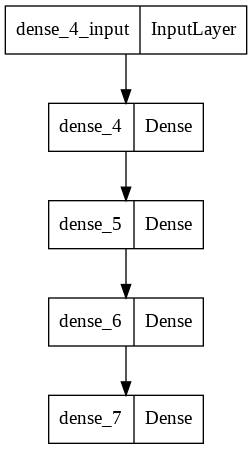

In [ ]:
# plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
11200/11200 [==============================] - 24s 2ms/step - loss: 0.2469 - accuracy: 0.9244 - val_loss: 0.1917 - val_accuracy: 0.9329
Epoch 2/200
11200/11200 [==============================] - 25s 2ms/step - loss: 0.2120 - accuracy: 0.9310 - val_loss: 0.1930 - val_accuracy: 0.9340
Epoch 3/200
11200/11200 [==============================] - 20s 2ms/step - loss: 0.2052 - accuracy: 0.9323 - val_loss: 0.1848 - val_accuracy: 0.9362
Epoch 4/200
11200/11200 [==============================] - 21s 2ms/step - loss: 0.2041 - accuracy: 0.9325 - val_loss: 0.1982 - val_accuracy: 0.9299
Epoch 5/200
11200/11200 [==============================] - 23s 2ms/step - loss: 0.2022 - accuracy: 0.9328 - val_loss: 0.1868 - val_accuracy: 0.9340
Epoch 6/200
11200/11200 [==============================] - 22s 2ms/step - loss: 0.1992 - accuracy: 0.9342 - val_loss: 0.1895 - val_accuracy: 0.9385
Epoch 7/200
11200/11200 [==============================] - 22s 2ms/step - loss: 0.2004 - accuracy: 0.9338 - val_

In [ ]:
model.evaluate(X_test, y_test)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2404 - accuracy: 0.9376


[0.240425705909729, 0.937583327293396]

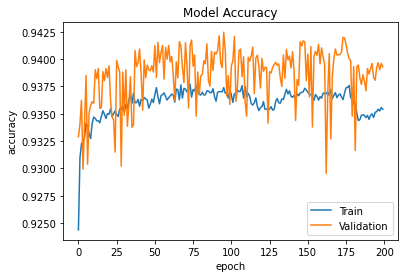

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

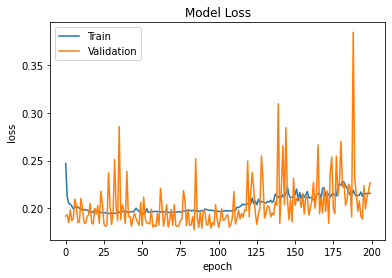

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## Recommendations

1. We recommend to the World Health Organization (WHO)to test people with flu like symptoms, head-aches and fever should be tested for COVID-19 
2. People with the observed symptoms should isolate themselves as per the WHO requirements to prevent the spread of the virus.
3. More features should be used to investigate the target variable. More global data may help narrow down specific symptoms
4. The public health department should organize regular campaigns and educate the public on the spread and the latest symptoms released by the WHO. Vaccination drives should also be organized and doses be distributed as per the WHO healthcare guidelines.
5. It is advisable to encourage people to seek clinical tests instead of self-medicating after matching symptoms with an infected patient.
